In [2]:
import numpy as np
import matplotlib.pyplot as plt


# clos

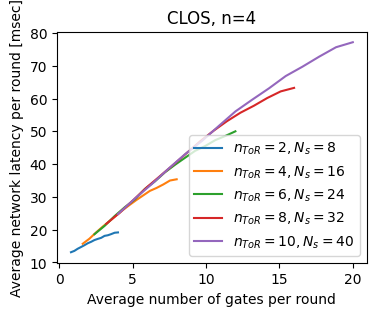

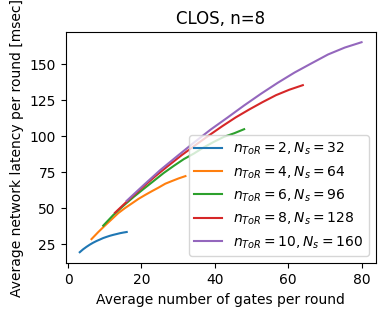

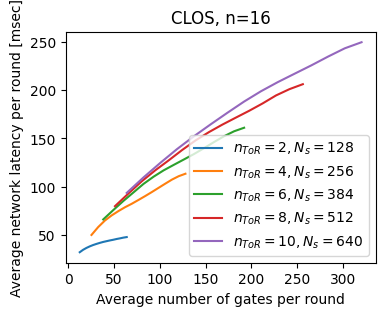

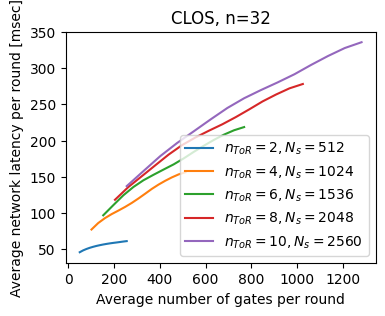

In [22]:
n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files

for n in n_list:
    plt.figure(figsize=(4,3))
    for i_rep in range(Nrep):
        fname = f"results/network_sim/clos_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        num_ToR_list = f1['arr_0'] 
        lam_gate_list = f1['arr_1'] 
        num_node_list = f1['arr_2'] 
        if i_rep ==0:
            Ntot = np.zeros((len(num_ToR_list),len(lam_gate_list)))
            Tavg = np.zeros((len(num_ToR_list),len(lam_gate_list)))
        Nq = f1['arr_3']
        Ntot += Nq
        Tavg += f1['arr_4'] * Nq

    Tavg = Tavg/Ntot
    for i_tor, num_ToR in enumerate(num_ToR_list):
        # plt.plot(lam_gate_list,T[i_tor,:]*1e3,"-",label=f"{num_ToR}")
        plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",label=r"$n_{ToR}=$"+f"{num_ToR}"+r"$,N_s=$"+f"{n**2/4*num_ToR:.0f}")

    plt.legend()
    # plt.xlim(0,200)
    # plt.ylim(1,250)
    plt.title(f"CLOS, n={n}")
    plt.xlabel("Average number of gates per round")
    plt.ylabel("Average network latency per round [msec]")
    plt.show()

superimposed

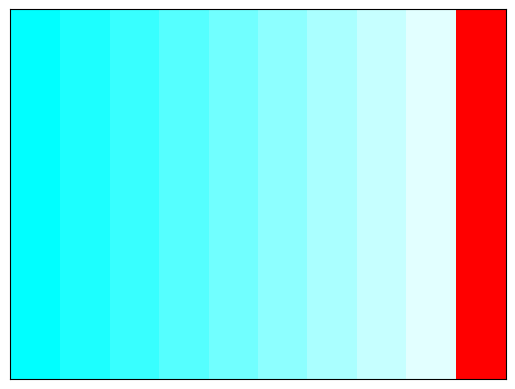

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_color_map(start_color, end_color, n):
    """
    Create a color map for a color gradient with n colors and two bound colors.

    Parameters:
        start_color (tuple): RGB tuple representing the starting color.
        end_color (tuple): RGB tuple representing the ending color.
        n (int): Number of colors in the color map.

    Returns:
        colormap (LinearSegmentedColormap): Color map with n colors.
    """
    cmap_data = []
    for i in range(n):
        r = start_color[0] + (end_color[0] - start_color[0]) * (i / (n - 1))
        g = start_color[1] + (end_color[1] - start_color[1]) * (i / (n - 1))
        b = start_color[2] + (end_color[2] - start_color[2]) * (i / (n - 1))
        cmap_data.append((i / (n - 1), r, g, b))

    return LinearSegmentedColormap.from_list("custom_cmap", cmap_data, N=n)

def plot_color_map(color_map):
    """
    Plot the color map.

    Parameters:
        color_map (LinearSegmentedColormap): Color map to be plotted.
    """
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    plt.imshow(gradient, aspect='auto', cmap=color_map)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def hex_to_rgb(hex_code):
    """
    Convert a hex color code to an RGB tuple.

    Parameters:
        hex_code (str): Hex color code (e.g., "#RRGGBB").

    Returns:
        rgb_tuple (tuple): RGB tuple representing the color.
    """
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))

# Example usage:
hex_color = '#1f77b4'  # Orange
rgb_color = hex_to_rgb(hex_color)
# print("RGB tuple for color", hex_color, ":", rgb_color)

# Example usage:
start_color = rgb_color  # Red
end_color = (0, 0, 255)     # Blue
n = 10                      # Number of colors in the gradient

custom_cmap = create_color_map(start_color, end_color, n)
plot_color_map(custom_cmap)


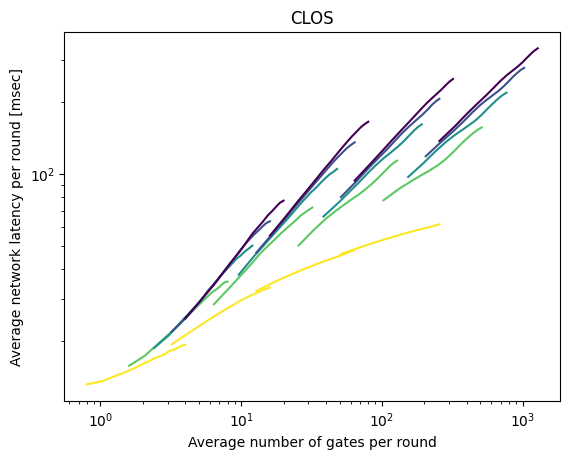

In [38]:
n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files

for n in n_list:
    # plt.figure(figsize=(4,3))
    for i_rep in range(Nrep):
        fname = f"results/network_sim/clos_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        num_ToR_list = f1['arr_0'] 
        lam_gate_list = f1['arr_1'] 
        num_node_list = f1['arr_2'] 
        if i_rep ==0:
            Ntot = np.zeros((len(num_ToR_list),len(lam_gate_list)))
            Tavg = np.zeros((len(num_ToR_list),len(lam_gate_list)))
        Nq = f1['arr_3']
        Ntot += Nq
        Tavg += f1['arr_4'] * Nq

    Tavg = Tavg/Ntot

    y_color = np.linspace(0,1,len(num_ToR_list))
    colors_bar = plt.cm.viridis_r(y_color)
    color = np.zeros(4)
    
    custom_cmap = create_color_map(start_color, end_color, n)

    for i_tor, num_ToR in enumerate(num_ToR_list):
        y_val = num_ToR/10
    # plt.plot(lam_gate_list,T[i_tor,:]*1e3,"-",label=f"{num_ToR}")
        plt.plot(num_node_list[i_tor]*lam_gate_list,Tavg[i_tor,:]*1e3,"-",color=colors_bar[i_tor,:],label=r"$n_{ToR}=$"+f"{num_ToR}"+r"$,N_s=$"+f"{n**2/4*num_ToR:.0f}")

# plt.legend()
# plt.xlim(0,200)
# plt.ylim(1,250)
plt.xscale("log")
plt.yscale("log")
plt.title(f"CLOS")
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show() 

    

8
96
896
7680


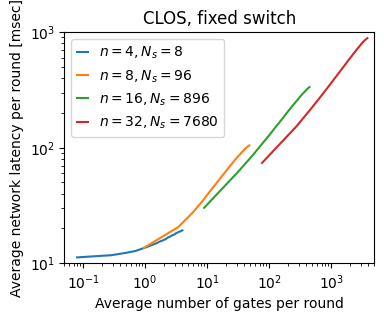

In [68]:
# no ToR

n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files

plt.figure(figsize=(4,3))
for n in n_list:
    for i_rep in range(Nrep):
        fname = f"results/network_sim/clos_noToR_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        lam_gate_list = f1['arr_0'] 
        num_node = f1['arr_1'] 
        if i_rep ==0:
            Ntot = np.zeros(len(lam_gate_list))
            Tavg = np.zeros(len(lam_gate_list))
        Nq = f1['arr_2']
        Ntot += Nq
        Tavg += f1['arr_3'] * Nq

    Tavg = Tavg/Ntot
    print(num_node)
    # print(lam_gate_list.shape)
    plt.plot(num_node*lam_gate_list,Tavg*1e3,"-",label=r"$n=$"+f"{n}"+r"$,N_s=$"+f"{n**2/4*(n-2):.0f}")

plt.legend(handlelength=0.8)
# plt.xlim(0,200)
# plt.ylim(1,250)
plt.xlim(5e-2,5e3)
plt.ylim(1e1,1e3)
plt.xscale("log")
plt.yscale("log")
plt.title(f"CLOS, fixed switch")
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show()

# fat tree

16
128
1024
8192


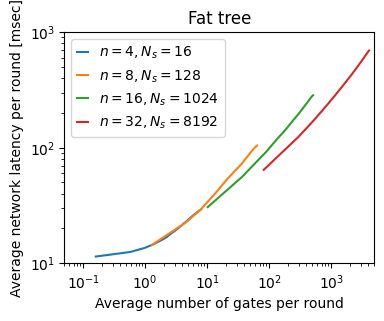

In [69]:
n_list = [4,8,16,32] # number of core switch ports
gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec

Nrep = 28 # No. of repetitions for saving separate files

plt.figure(figsize=(4,3))
for n in n_list:
    for i_rep in range(Nrep):
        fname = f"results/network_sim/fattree_n_{n}_gen_{1e3/gen_rate:.1f}_sw_{1e3*switch_duration:.1f}_r_{i_rep}.npz"

        f1 = np.load(fname)
        lam_gate_list = f1['arr_0'] 
        num_node = f1['arr_1'] 
        if i_rep ==0:
            Ntot = np.zeros(len(lam_gate_list))
            Tavg = np.zeros(len(lam_gate_list))
        Nq = f1['arr_2']
        Ntot += Nq
        Tavg += f1['arr_3'] * Nq

    Tavg = Tavg/Ntot
    print(num_node)
    plt.plot(num_node*lam_gate_list,Tavg*1e3,"-",label=r"$n=$"+f"{n}"+r"$,N_s=$"+f"{n**3/4:.0f}")

plt.legend(handlelength=0.8)
plt.xlim(5e-2,5e3)
plt.ylim(1e1,1e3)
plt.xscale("log")
plt.yscale("log")
plt.title(f"Fat tree")
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show()